In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [13]:
data = pd.read_csv('dataset\Student_Performance.csv')
print(data.head())

   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1                 91  
1                                 2                 65  
2                                 2                 45  
3                                 2                 36  
4                                 5                 66  


In [14]:
X = data[['Hours Studied','Previous Scores','Extracurricular Activities','Sleep Hours','Sample Question Papers Practiced']].values  # 提取特征矩阵（二维数组）
y = data['Performance Index'].values  # 提取目标向量
print("X的形状:", X.shape)
print("y的形状:", y.shape)

X的形状: (10000, 5)
y的形状: (10000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test)) # 验证拆分比例是否正确
y_train = y_train.reshape(-1,1) # 改变形状为列向量
y_test = y_test.reshape(-1,1) # 改变形状为列向量
print(y_train.shape)
print(y_test.shape)

8000 2000
(8000,)
(2000,)
(8000, 1)
(2000, 1)


In [61]:
# 计算训练集的均值和标准差
X_train_mean = np.mean(X_train)
X_train_std = np.std(X_train)

# 对训练集和测试集进行标准化
X_train_scaled = (X_train - X_train_mean) / X_train_std
X_test_scaled = (X_test - X_train_mean) / X_train_std

print("标准化后训练集均值:", np.mean(X_train_scaled))  # 应该接近0
print("标准化后训练集标准差:", np.std(X_train_scaled))  # 应该接近1



标准化后训练集均值: -2.0961010704922955e-17
标准化后训练集标准差: 1.0000000000000002


Epoch 0: Loss=3610.06, w=['-4.454', '23.810', '-6.301', '-2.907', '-5.455'], b=11.148
Epoch 100: Loss=45.60, w=['11.429', '28.069', '-2.466', '0.533', '-0.852'], b=5.086
Epoch 200: Loss=34.75, w=['21.310', '28.495', '-3.985', '0.484', '-0.632'], b=7.791
Epoch 300: Loss=26.91, w=['29.532', '28.456', '-5.562', '0.391', '-0.517'], b=10.608
Epoch 400: Loss=21.16, w=['36.527', '28.394', '-6.946', '0.412', '-0.318'], b=13.122
Epoch 500: Loss=16.94, w=['42.491', '28.337', '-8.145', '0.535', '-0.053'], b=15.347
Epoch 600: Loss=13.83, w=['47.579', '28.287', '-9.180', '0.739', '0.252'], b=17.315
Epoch 700: Loss=11.53, w=['51.922', '28.243', '-10.073', '1.008', '0.579'], b=19.060
Epoch 800: Loss=9.83, w=['55.630', '28.205', '-10.842', '1.327', '0.912'], b=20.609
Epoch 900: Loss=8.57, w=['58.798', '28.171', '-11.501', '1.683', '1.243'], b=21.987
Epoch 1000: Loss=7.62, w=['61.506', '28.141', '-12.064', '2.067', '1.564'], b=23.214
Epoch 1100: Loss=6.91, w=['63.822', '28.114', '-12.544', '2.469', '1.

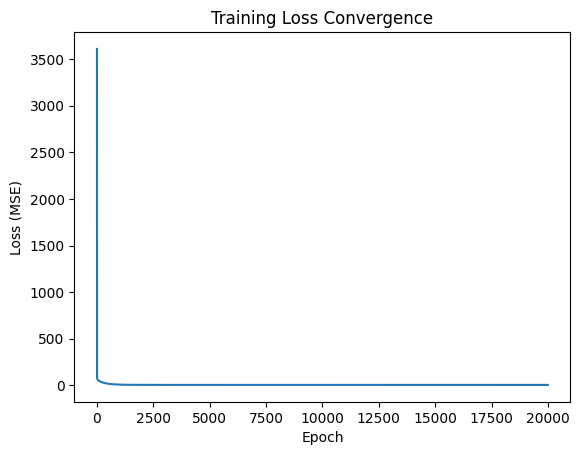

In [44]:
# 超参数设置（保持不变）
learning_rate = 0.1
epochs = 20000

# 参数初始化（关键修改点）
np.random.seed(42)
w = np.random.randn(5).reshape(-1,1)  # 5个权重对应5个特征
b = np.random.randn()

loss_history = []

# 梯度下降主循环
for epoch in range(epochs):
    # 前向传播
    y_pred = (np.dot(X_train_scaled, w) + b).reshape(-1,1) 
    # 计算损失
    loss = np.mean((y_pred - y_train)**2)
    loss_history.append(loss)

    # 反向传播
    dw = (2/len(y_train)) * np.dot(X_train_scaled.T, (y_pred - y_train))  
    db = (2/len(y_train)) * np.sum(y_pred - y_train)

    # 参数更新
    w -= learning_rate * dw
    b -= learning_rate * db
    
    # 打印修改（展示所有参数）
    if epoch % 100 == 0:
        w_str = [f"{w[i][0]:.3f}" for i in range(5)]
        print(f"Epoch {epoch}: Loss={loss:.2f}, w={w_str}, b={b:.3f}")
        
# 绘制损失下降曲线
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Convergence")
plt.show()

In [47]:
# 使用训练好的参数对测试集进行预测
y_pred_test = np.dot(X_test_scaled, w) + b 

# 计算测试集上的损失（MSE）
test_loss = np.mean((y_pred_test - y_test)**2)
print(f"\nTest Loss (MSE): {test_loss:.2f}")

# 可选：计算R²分数
ss_res = np.sum((y_test - y_pred_test)**2)
ss_tot = np.sum((y_test - np.mean(y_test))**2)
r2_score = 1 - (ss_res / ss_tot)
print(f"Test R² Score: {r2_score:.2f}")


Test Loss (MSE): 4.15
Test R² Score: 0.99


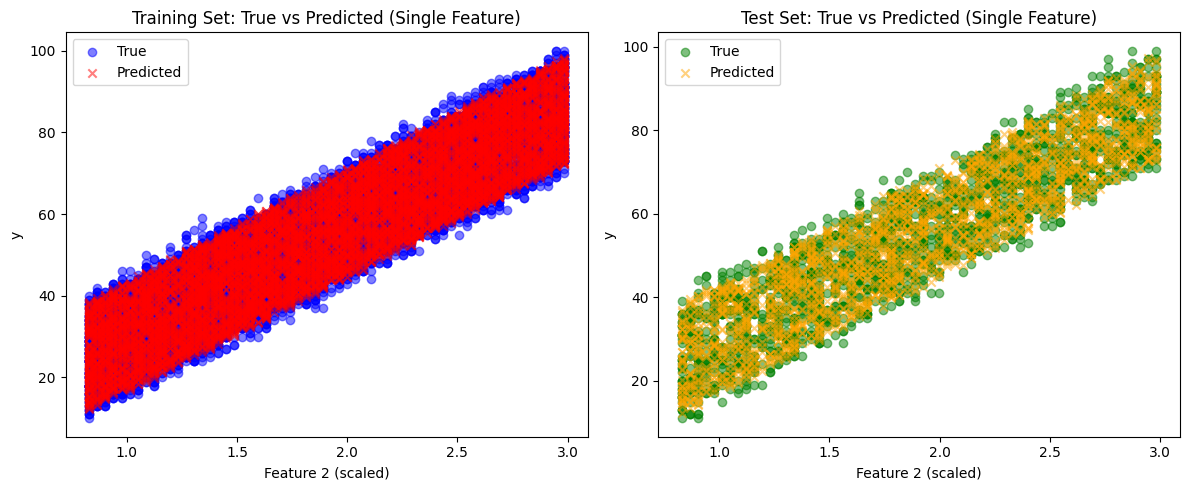

In [ ]:
plt.figure(figsize=(12, 5))

# 假设我们选择第2个特征（索引1）进行可视化
selected_feature = 1

# 训练集结果（仅展示第一个特征）
plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled[:, selected_feature], y_train, label="True", color="blue", alpha=0.5)
plt.scatter(X_train_scaled[:, selected_feature], np.dot(X_train_scaled, w) + b, 
            label="Predicted", color="red", alpha=0.5, marker="x")
plt.xlabel(f"Feature {selected_feature + 1} (scaled)")
plt.ylabel("y")
plt.title("Training Set: True vs Predicted (Single Feature)")
plt.legend()

# 测试集结果（仅展示第一个特征）
plt.subplot(1, 2, 2)
plt.scatter(X_test_scaled[:, selected_feature], y_test, label="True", color="green", alpha=0.5)
plt.scatter(X_test_scaled[:, selected_feature], np.dot(X_test_scaled, w) + b, 
            label="Predicted", color="orange", alpha=0.5, marker="x")
plt.xlabel(f"Feature {selected_feature + 1} (scaled)")
plt.ylabel("y")
plt.title("Test Set: True vs Predicted (Single Feature)")
plt.legend()

plt.tight_layout()
plt.show()

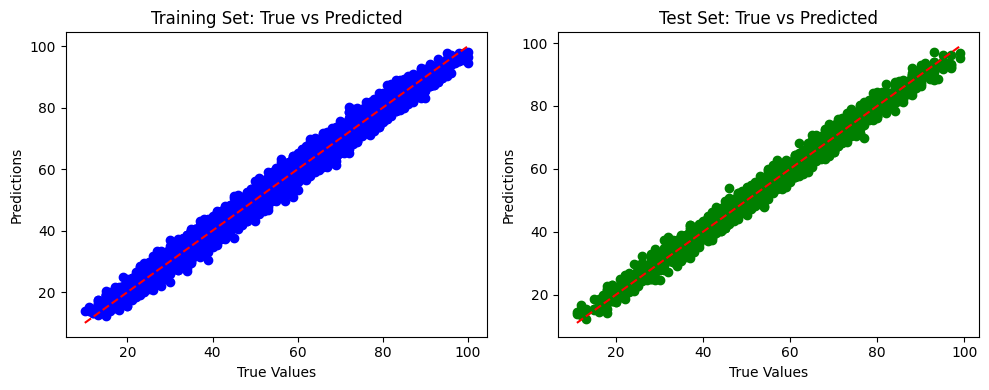

In [64]:
plt.figure(figsize=(10, 4))

# 训练集预测结果
plt.subplot(1, 2, 1)
plt.scatter(y_train, np.dot(X_train_scaled, w) + b, color="blue")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "r--")  # 对角线
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Training Set: True vs Predicted")

# 测试集预测结果
plt.subplot(1, 2, 2)
plt.scatter(y_test, np.dot(X_test_scaled, w) + b, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Test Set: True vs Predicted")

plt.tight_layout()
plt.show()

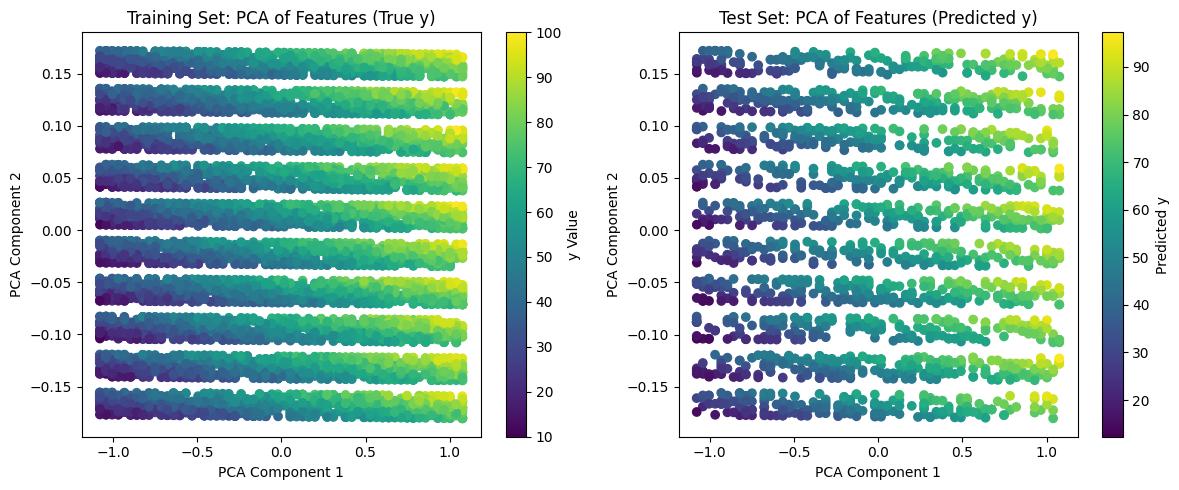

In [65]:
from sklearn.decomposition import PCA

# 将特征降至2维
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

plt.figure(figsize=(12, 5))

# 训练集降维结果
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap="viridis", label="True")
plt.colorbar(scatter, label="y Value")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Training Set: PCA of Features (True y)")

# 测试集降维结果
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=np.dot(X_test_scaled, w) + b, cmap="viridis", label="Predicted")
plt.colorbar(scatter, label="Predicted y")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Test Set: PCA of Features (Predicted y)")

plt.tight_layout()
plt.show()